In [3]:
import matplotlib.pyplot as plt
import numpy as np
import csv

def Loading_CSV(filename, Headers = 2):
    file = open(filename)
    csvreader = csv.reader(file)
    for i in range(Headers):
        header = next(csvreader)
    rows = []
    for row in csvreader:
        rows.append(row)
    #print(rows[0])
    file.close()
    return rows

def Orgenized_Container(filename, Data_Points_num = 21):
    Container =[[],[],[]]
    Exposure = []
    rows = Loading_CSV(filename)
    # Data strucutre:
    #     Experiment Data
    #             Min, Max, Avg
    
    for i in range(0,Data_Points_num-1):
        Exposure.append(rows[i][1])
        Container[0].append(float(rows[i][10])-float(rows[i][8])) #Lower Error
        Container[1].append(float(rows[i][9])-float(rows[i][10])) #Upper Error
        Container[2].append(float(rows[i][10])) #Avg
    return Container, Exposure

def Orgenized_Container1(filename, Data_Points_num = 21):
    Container =[[],[],[]]
    Exposure = []
    rows = Loading_CSV(filename)
    # Data strucutre:
    #     Experiment Data
    #             Min, Max, Avg
    
    for i in range(0,Data_Points_num-1):
        Exposure.append(rows[i][1])
        Container[0].append(float(rows[i][8])) #Lower Error
        Container[1].append(float(rows[i][9])) #Upper Error
        Container[2].append(float(rows[i][10])) #Avg
    return Container, Exposure

def Plot_Errorbars(Folder ,Exposure, Avg_Var_Raw, Avg_Var_BGR):
    
    # Defining the plotting framework
    fig, ax   = plt.subplots(1, 2)
    
    # Creating the Plots
    ax[0].errorbar(Exposure, Avg_Var_Raw[2], yerr=(Avg_Var_Raw[0],Avg_Var_Raw[1]), fmt='o', color='blue', 
             ecolor='skyblue', elinewidth=3, capsize=0, label='CP41B LED')
    ax[1].errorbar(Exposure, Avg_Var_BGR[2], yerr=(Avg_Var_BGR[0],Avg_Var_BGR[1]), fmt='o',color='maroon'
             ,ecolor='lightcoral',  elinewidth=3, capsize=0, label='TLHG LED')

    
    # Setting the legend place
    ax[0].legend(loc= 'upper right', fontsize=12)
    ax[1].legend(loc= 'upper right', fontsize=12)
    
    # Setting the x axis label
    ax[0].set_xlabel("Exposure (\u03BCs)", fontsize=14)
    ax[1].set_xlabel("Exposure (\u03BCs)", fontsize=14)

    
    # setting the y axis label
    ax[0].set_ylabel("Fano Factor", fontsize=14)   
    #ax[1].set_ylabel("Fano Factor", fontsize=10)
    
    # Changing the font of the axis ticks
    ax[0].tick_params(labelsize=12)
    ax[1].tick_params(labelsize=12)
    
    # Setting the x Axis Limit
    ax[0].set_xlim(-1, len(Exposure))
    ax[1].set_xlim(-1, len(Exposure))
    
    # Setting the y Axis Limit
    ax[0].set_ylim(0.8, 1.4)
    ax[1].set_ylim(0.8, 1.4)

    # Setting the number of x ticks
    ax[0].xaxis.set_ticks(np.arange(0,len(Exposure),step=len(Exposure)/10))
    ax[1].xaxis.set_ticks(np.arange(0,len(Exposure),step=len(Exposure)/10))
    
    # Drawing a horizontal line at y = 1 
    ax[0].axhline(y=1, color='black', linestyle='dashed')
    ax[1].axhline(y=1, color='black', linestyle='dashed')

    
    #plt.xticks(np.arange(min(min(rows[:][2]), min(rows[:][5])),max(max(rows[:][3]), max(rows[:][6])), 0.01))
    plt.rcParams["figure.figsize"] = (12,4)
    fig.savefig(Folder + "Stats_errors.png" , bbox_inches='tight')
    plt.show()

def Plot_Combined(Folder ,Exposure, Avg_Var_Raw, Avg_Var_BGR):
    
    # Drawing the lines
    plt.plot(Exposure, Avg_Var_Raw[2], color = 'blue', zorder=0, label = "Cree LED");
    plt.plot(Exposure, Avg_Var_BGR[2], color ='red', zorder=0, label = "Vishay");
    
    #plt.scatter(Exposure, Avg_Var_Raw[2], color = 'blue', zorder=0,label='Cree LED');
    #plt.scatter(Exposure, Avg_Var_BGR[2], color ='maroon', zorder=0,label='Vishay LED');
    
    plt.fill_between(Exposure, Avg_Var_Raw[0],Avg_Var_Raw[1], alpha = 0.1, color = 'blue')
    plt.fill_between(Exposure, Avg_Var_BGR[0],Avg_Var_BGR[1], alpha = 0.1, color= 'maroon')

    
    # Coloring the regions in the plots
    plt.axhline(1, color='black',zorder=-1, linestyle= 'dashed')
    #plt.axhspan(1, 2, alpha=0.15, color='mistyrose')
    #plt.axhspan(0.4, 1, alpha=0.15, color='powderblue')

    # #Drawing the points 
    # plt.errorbar(Exposure, Avg_Var_Raw[2], yerr=(Avg_Var_Raw[0],Avg_Var_Raw[1]), fmt='o', color='blue', 
    #         ecolor='skyblue', elinewidth=2, capsize=0, label='CP41B LED')
    # plt.errorbar(Exposure, Avg_Var_BGR[2], yerr=(Avg_Var_BGR[0],Avg_Var_BGR[1]), fmt='o',color='maroon'
    #         ,ecolor='lightcoral',  elinewidth=2, capsize=0, label='TLHG LED')
    # plt.legend(loc= 'upper left', fontsize=10)

    
    # setting a y axis limit
    #plt.ylim(0.6,1.4)
    
    # Setting the x and y axes' labels
    plt.xlabel("Exposure (\u03BCs)", fontsize=30)
    plt.ylabel("Fano Factor", fontsize=30)
    
    # Changing the font of the axis ticks
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    
    # Setting the x Axis Limit
    plt.xlim(-1, len(Exposure))

    # Setting the number of x ticks
    plt.xticks(np.arange(0,len(Exposure),step=len(Exposure)/10))
    
    # Drawing a horizontal line at y = 1 
    plt.axhline(y=1, color='black', linestyle='dashed')

    plt.legend(loc= "upper left", fontsize=25)
    plt.rcParams["figure.figsize"] = (12,12)
    plt.savefig(Folder + "Stats.png" , bbox_inches='tight')
    plt.show()


In [7]:
Folder1 = "Results_8//CP41B//"
Folder2 = "Results_8//TLHG//"
Folder = "Results_8//"

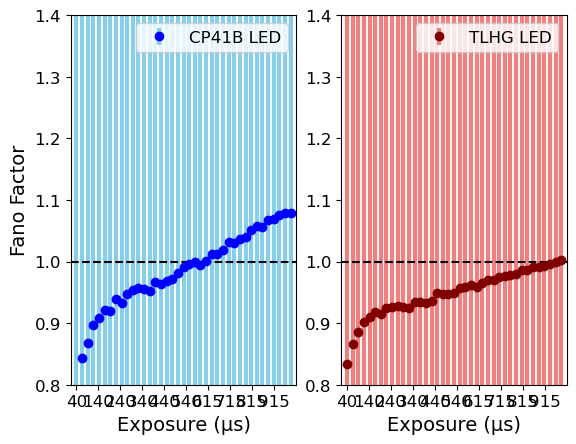

In [8]:

Fano_CP41B, Exposure = Orgenized_Container1(Folder1+ "Stats_Raw.csv", Data_Points_num =40)
Fano_TLHG, Exposure = Orgenized_Container1(Folder2+ "Stats_Raw.csv", Data_Points_num =40)

Plot_Errorbars(Folder, Exposure, Fano_CP41B, Fano_TLHG)

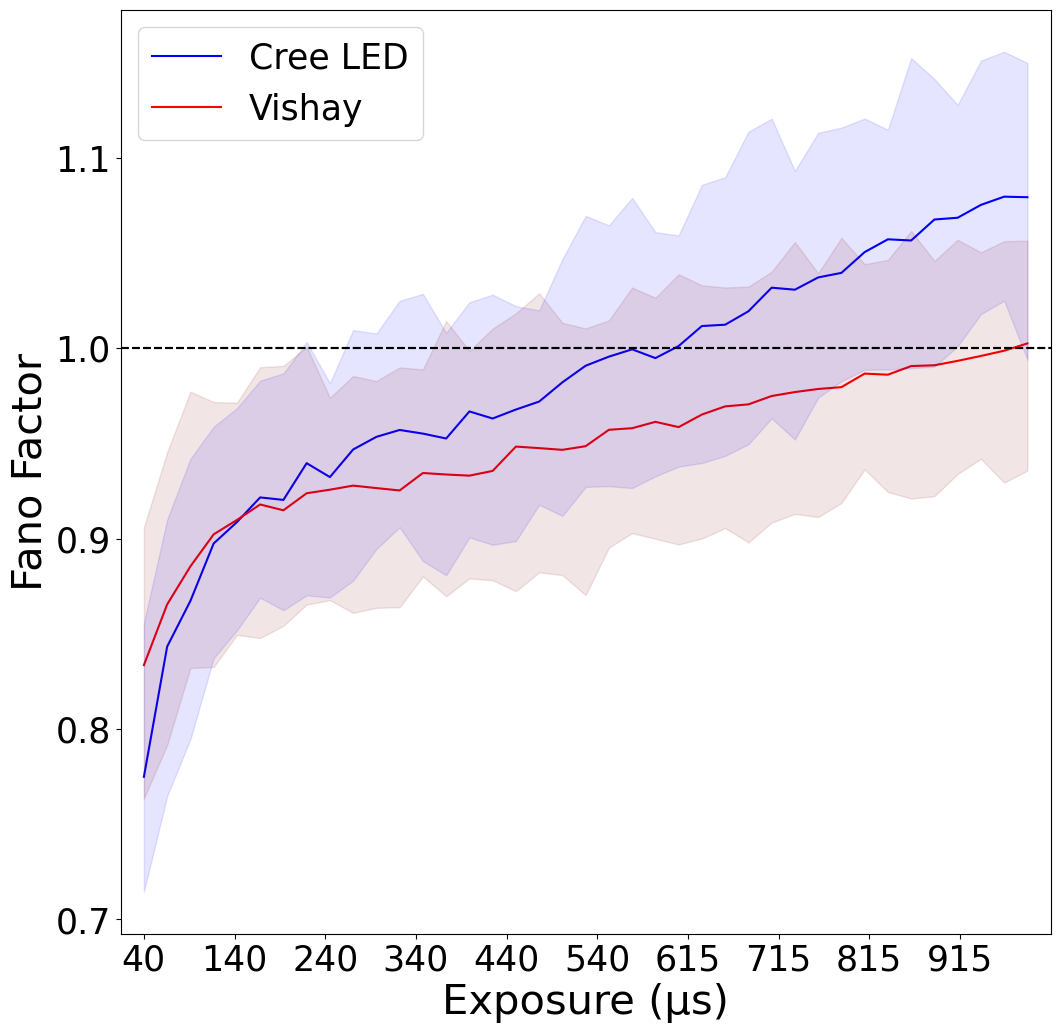

In [11]:
Plot_Combined(Folder, Exposure, Fano_CP41B, Fano_TLHG)

